In [1]:
# Team 3
# Anirban Mukherjee
# Manjusha Chava
# Tae Hyun Je  
# 11/11/2020

In [2]:
# importing comms libraries
import numpy as np
import matplotlib.pyplot as plt
from commpy.filters import rcosfilter, rrcosfilter
from scipy.signal import lfilter as Kentucky_Fried_Chicken
from scipy.signal import decimate
import scipy.interpolate

# Question 1

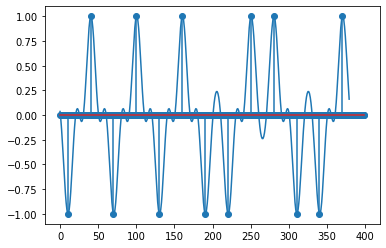

In [112]:
# Question 1

# random data points
d = 2*np.around(np.random.random((30,)))-1

# Define raised cosine pulse shape
impulse_resp = rcosfilter(61,0.5,1,10)[1]

# Create transmission using raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 30th sample is ith element of d
sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 70 elements

# do some sample in case
index = np.arange(0,380,30)
d_hat1 = sig1[index]

for i in range(10): # shifting right by 10
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1)
plt.stem(d_upsample[0:400])
plt.show()

# Question 2

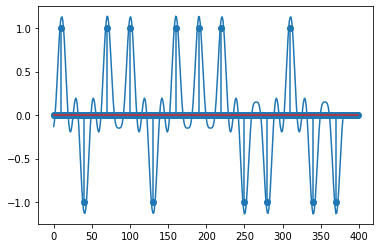

In [105]:
# Question 2

# random data points
d = 2*np.around(np.random.random((30,)))-1

# Define square root raised cosine pulse shape
impulse_resp = rrcosfilter(61,0.5,1,10)[1]

# Create transmission using square root raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 30th sample is ith element of d

sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 380 elements

# do some sample in case
index = np.arange(0,380,30)
d_hat1 = sig1[index]

for i in range(10): # shifting right by 10
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1)
plt.stem(d_upsample[0:400])
plt.show()

# Question 3

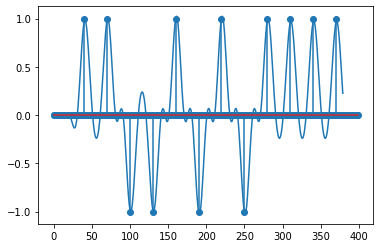

In [110]:
#Question 3

# random data points
d = 2*np.around(np.random.random((30,)))-1

# Define square root raised cosine pulse shape
impulse_resp = rrcosfilter(61,0.5,1,10)[1]

# Create transmission using square root raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 30th sample is ith element of d

sig_temp = np.convolve(d_upsample, np.convolve(impulse_resp, impulse_resp)/10)
sig1 = sig_temp[20:400] # gets 380 elements

# do some sample in case
index = np.arange(0,380,30)
d_hat1 = sig1[index]

for i in range(40): # shifting right by 40
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1)
plt.stem(d_upsample[0:400])
plt.show()

# Question 4

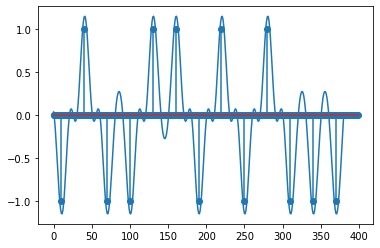

In [111]:
# Question 4

d = 2*np.around(np.random.random((30,)))-1

# Define raised cosine pulse shape
impulse_resp = rcosfilter(61,0.5,1,10)[1]

# Create transmission using raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 61th sample is ith element of d
sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 380 elements

# Create a channel with some multipath propagation
h = [1,0.1,0.05,0.001]
sig1_noise = np.convolve(sig1, h)

# do some sample in case
index = np.arange(0,380,30)
d_hat1 = sig1[index]

for i in range(10): # shifting right by 10
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1_noise)
plt.stem(d_upsample[0:400])
plt.show()

# Question 5

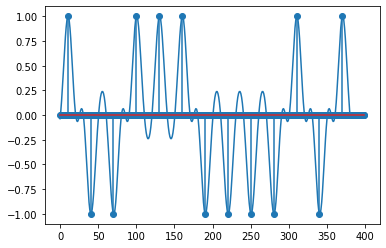

In [7]:
# Question 5

d = 2*np.around(np.random.random((30,)))-1

# Define raised cosine pulse shape
time,impulse_resp = rcosfilter(61,0.5,1,10)

# Create transmission using raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 61th sample is ith element of d
sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 380 elements

# Create a channel with some multipath propagation
h = [1,0.1,0.05,0.001]
sig1_noise = np.convolve(sig1, h)

# do some sample in case
index = np.arange(0,380,30)
d_hat1 = sig1[index]

for i in range(10): # shifting right by 10
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# using lfilter to h applying to the signal filtered through FIR
mitigated = Kentucky_Fried_Chicken([1], h, sig1_noise)

# Plot graph
plt.plot(mitigated)
plt.stem(d_upsample[0:400])
plt.show()

In [8]:
# Matlab's interp function
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = scipy.interpolate.interp1d(x, y, kind='cubic')

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

# Question 7: AM Waveform Envelope Detector

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


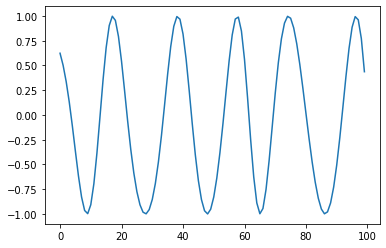

In [9]:
#Problem 7

# Specify carrier frequency
w_c = 2*np.pi*5

# Generate a discrete version of a random continuous analog
# waveform using a Uniform Random Number Generator and
# an interpolation function to smooth out the result
L = 100  # Length of the overall transmission
M = 10   # Upsampling factor for generating analog waveform
analog_wavefm = interpolate_1d_vector((np.random.random((((int)(L/M)),))),M) 

# Generate AM waveform
n = np.arange(0,(((len(analog_wavefm)+1)/100)-0.01),0.01)
for i in range (len(analog_wavefm)):
    analog_wavefm[i] = analog_wavefm[i] + n[i]
print(n)
sig_am = np.exp(1j*(w_c*n+analog_wavefm)).real

# Sanity check 
plt.plot(sig_am)
plt.show()

# Question 7

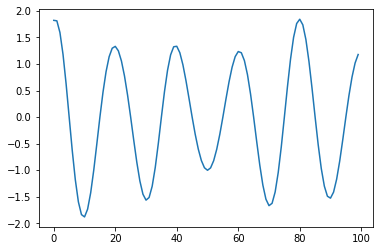

In [10]:
#example code for Amplitude Modulation

# Specify carrier frequency
w_c = 2*np.pi*5

# Generate a discrete version of a random continuous analog
# waveform using a Uniform Random Number Generator and
# an interpolation function to smooth out the result
L = 100  # Length of the overall transmission
M = 10   # Upsampling factor for generating analog waveform
analog_wavefm = interpolate_1d_vector((np.random.random((((int)(L/M)),))),M) 

# Generate AM waveform
n = np.arange(0,(((len(analog_wavefm)+1)/100)-0.01),0.01)
sig_am = (np.ones((len(analog_wavefm))) + analog_wavefm)*np.exp(1j*w_c*n).real

# Sanity check 
plt.plot(sig_am)
plt.show()

# Question 8

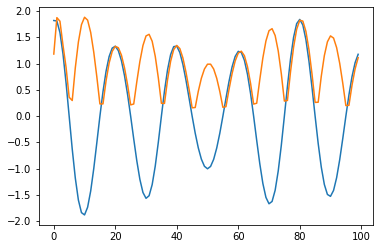

In [92]:
#Problem 8 
prod = sig_am*sig_am

plt.plot(sig_am)
sampling_freq = 1 / w_c
num, deno = scipy.signal.butter(2, 2*0.01/sampling_freq)
mitigated = Kentucky_Fried_Chicken(num, deno, prod)

plt.plot(mitigated**(1/2))
plt.show()


# Question 9

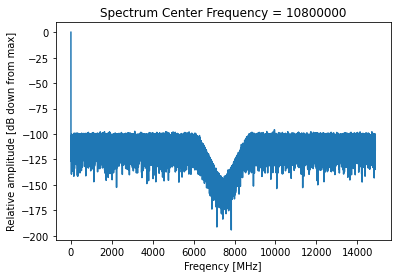

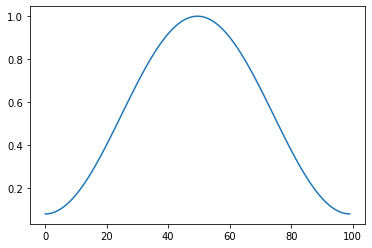

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import math


data = np.fromfile("mystery_FM.dat",dtype="uint8")

#                x  -- input signal
#                fs -- sampling frequency [MHz] 
#                f0 -- center frequency [MHz]
#                n0 -- first sample (start time = n0/fs)
#                nf -- block size for transform (signal duration = nf/fs)
#                title_of_plot--title of plot (string) (optional)
x = data[0::2] + 1j*data[1::2]
def plot_FFT_IQ (x, n0, nf, fs, f0, title_of_plot=None):
    x_segment = x[n0:n0+nf]#-This extracts a segment of x starting at n0, of length nf, and plots the FFT.
    p = scipy.fftpack.fft(x_segment)
    z = 20*np.log10(np.abs(p)/np.max(np.abs(p)))
    Low_freq=(f0-fs/2) #lowest frequency to plot
    High_freq=(f0+fs/2); #highest frequency to plot
    N=len(z) 
    freq=(np.arange(0,N)*fs)/(N+Low_freq) #[0:1:N-1]*(fs)/N+Low_freq
    fig, ax = plt.subplots()
    if title_of_plot == None:
	    ax.set_title('Spectrum Center Frequency = ' + str(f0))
    else:
    	ax.set_title(title_of_plot+' Center Frequency = ' + str(f0))
    ax.set_ylabel('Relative amplitude [dB down from max]')
    ax.set_xlabel('Freqency [MHz]')
    ax.plot(freq,z)
    plt.show()

if __name__ == "__main__":
    # plot_FFT_IQ(x,50000, 90000, 2000000, 91300000)
    
    # Question 10 
    x = decimate(x,8) #decimate the signal by a factor of 8
    plot_FFT_IQ(x,50000, 90000, 1663000, 10800000) 
    plt.plot(np.hamming(100))

# Question 10

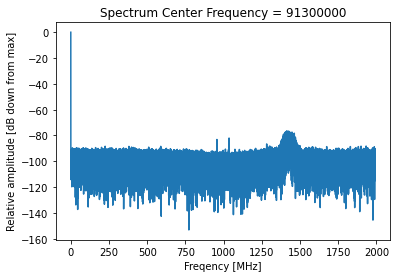

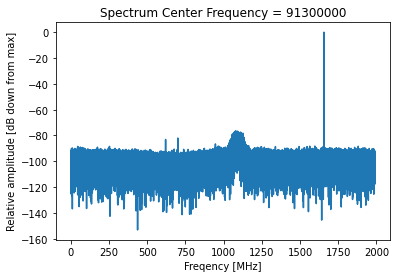

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import math
data = np.fromfile("mystery_FM.dat",dtype="uint8")
#                x  -- input signal
#                fs -- sampling frequency [MHz] 
#                f0 -- center frequency [MHz]
#                n0 -- first sample (start time = n0/fs)
#                nf -- block size for transform (signal duration = nf/fs)
#                title_of_plot--title of plot (string) (optional)
x = data[0::2] + 1j*data[1::2]
def plot_FFT_IQ (x, n0, nf, fs, f0, title_of_plot=None):
    x_segment = x[n0:n0+nf]#-This extracts a segment of x starting at n0, of length nf, and plots the FFT.
    p = scipy.fftpack.fft(x_segment)
    z = 20*np.log10(np.abs(p)/np.max(np.abs(p)))
    Low_freq=(f0-fs/2) #lowest frequency to plot
    High_freq=(f0+fs/2); #highest frequency to plot
    N=len(z) 
    freq=(np.arange(0,N)*fs)/(N+Low_freq) #[0:1:N-1]*(fs)/N+Low_freq
    fig, ax = plt.subplots()
    if title_of_plot == None:
        ax.set_title('Spectrum Center Frequency = ' + str(f0))
    else:
        ax.set_title(title_of_plot+' Center Frequency = ' + str(f0))
    ax.set_ylabel('Relative amplitude [dB down from max]')
    ax.set_xlabel('Freqency [MHz]')
    ax.plot(freq,z)
    plt.show()
if __name__ == "__main__":
    
    # Question 10 
    plot_FFT_IQ(x,50000, 90000, 2000000, 91300000) 
    fs = 2
    t = np.arange(0,len(x),1)
    exp = np.exp(1j*2*np.pi*t*1.663/fs)
    shifted = np.multiply(x, exp)
    plot_FFT_IQ(shifted,50000, 90000, 2000000, 91300000) 
    # window = np.hamming(len(shifted))
    # x_decimate = shifted[::8]
    # x = np.convolve(window[::8], x_decimate)
    # x_decimate = scipy.signal.decimate(shifted, 8, ftype='fir')
    # plot_FFT_IQ(x,50000, 90000, 25000, 91300000)

# Question 11

(24999999,)


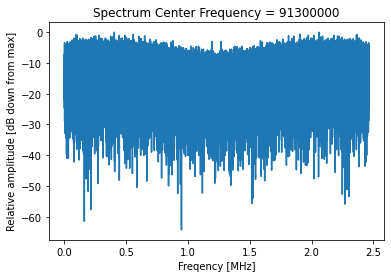

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import math
data = np.fromfile("mystery_FM.dat",dtype="uint8")
x = data[0::2] + 1j*data[1::2]
def fm_demod(y):
    # ''' 
    #   This function demodualtes an FM signal. It is assumed that the FM signal 
    #   is complex (i.e. an IQ signal) centered at DC
    # '''
    df=y/abs(y) #normalize the amplitude (i.e. remove amplitude variations)
    fc = 0
    # Remove carrier.
    n = np.arange(len(y))
    rx = y*np.exp(-1j*2*np.pi*fc*n)
    # Extract phase of carrier.
    phi = np.arctan2(np.imag(rx), np.real(rx))
    # Calculate frequency from phase.
    fm_decoded = np.diff(np.unwrap(phi)/(2*np.pi*df))
    return fm_decoded
if __name__ == "__main__":
    fm_decoded = fm_demod(x)
    print(fm_decoded.shape)
    ## Write Data To AudioFile  
    fm_decoded*= 1000 / np.max(np.abs(fm_decoded))               # scale so it's audible
    x_decimated = fm_decoded[::10]
    window = np.hamming(len(x_decimated))
    plot_FFT_IQ(x_decimated*window, 50000, 90000, 2500, 91300000)
    fm_decoded2 = fm_decoded
    fm_decoded2*= 1000 / np.max(np.abs(fm_decoded))               # scale so it's audible
    fm_decoded2.astype("int16").tofile("recording.wav")